In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split , cross_val_score

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

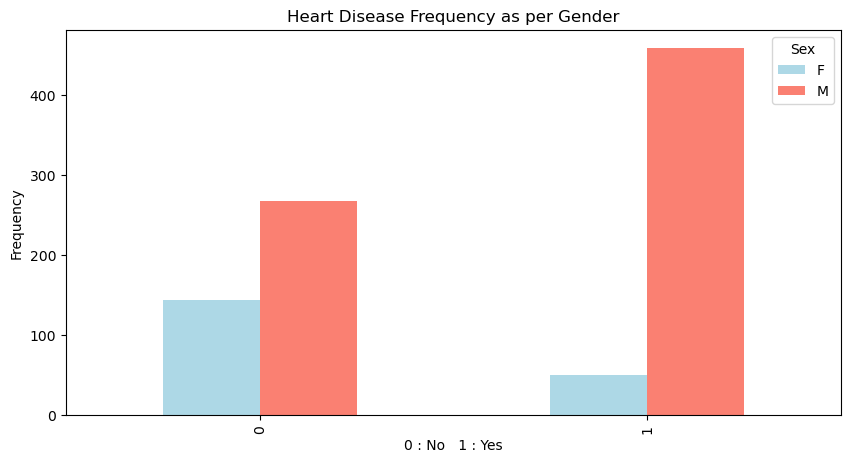

In [8]:
pd.crosstab(df.HeartDisease,df.Sex).plot(kind = 'bar',figsize=(10,5),color = ['lightblue','salmon'])
plt.title("Heart Disease Frequency as per Gender")
plt.xlabel("0 : No   1 : Yes")
plt.ylabel("Frequency");

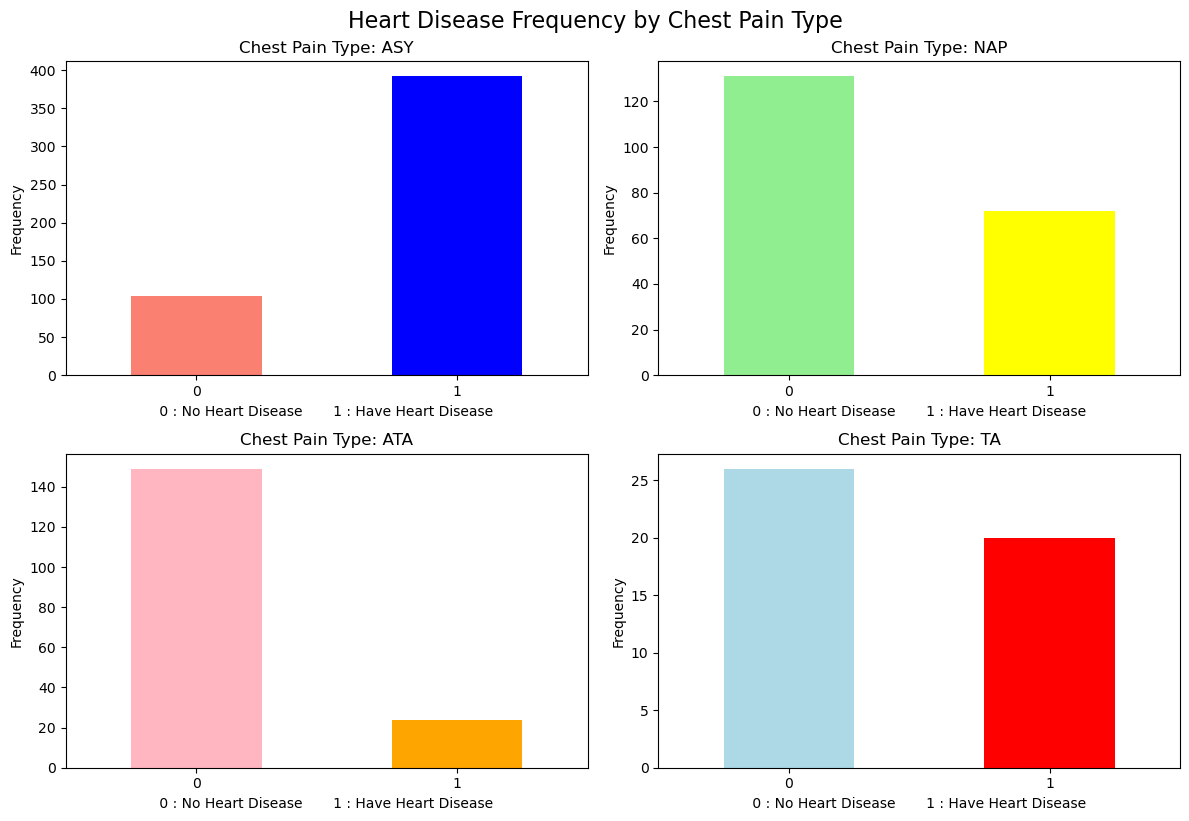

In [10]:
fig , axes = plt.subplots(nrows = 2,ncols = 2,figsize = (12,8))
crosstab = pd.crosstab(df.HeartDisease , df.ChestPainType)
colors = {
     "TA": ['lightblue','red'],
     "ATA": ['lightpink','orange'],
     "NAP": ['lightgreen','yellow'],
     "ASY": ['salmon','blue']
}
chest_pain = ["ASY", "NAP", "ATA", "TA"]
axes_flat = axes.flatten()  
for i , chest_pain_type in enumerate(chest_pain):
    ax = axes_flat[i]
    crosstab[chest_pain_type].plot.bar(ax=ax , color = colors[chest_pain_type])
    ax.set_title(f'Chest Pain Type: {chest_pain_type}')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(" 0 : No Heart Disease       1 : Have Heart Disease " )
    ax.set_xticklabels(['0','1'], rotation=0)

plt.tight_layout()

plt.suptitle("Heart Disease Frequency by Chest Pain Type", fontsize=16, y=1.02)
plt.show();

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


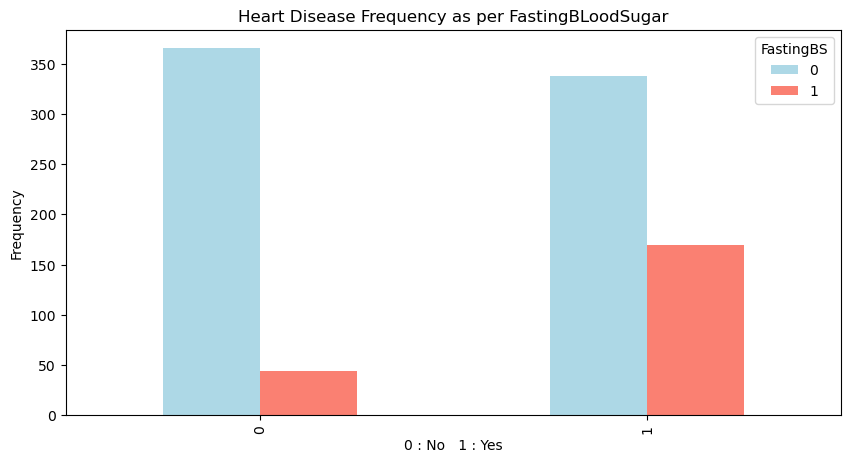

In [12]:
pd.crosstab(df.HeartDisease,df.FastingBS).plot(kind = 'bar',figsize=(10,5),color = ['lightblue','salmon'])
plt.title("Heart Disease Frequency as per FastingBLoodSugar")
plt.xlabel("0 : No   1 : Yes")
plt.ylabel("Frequency");

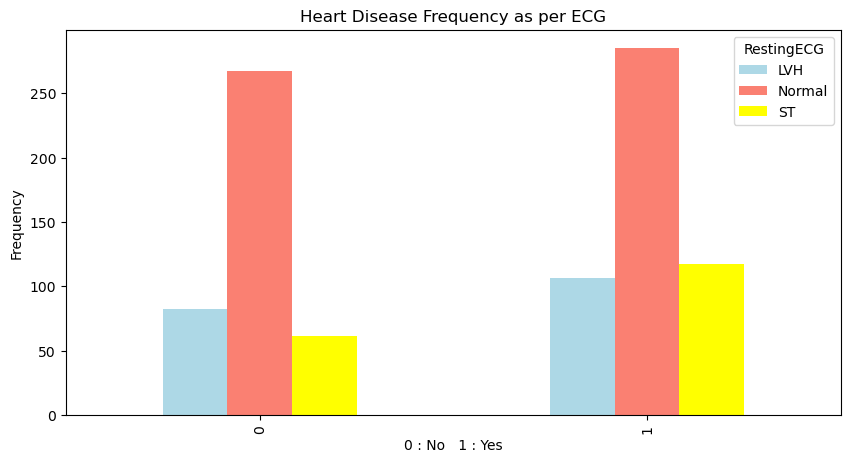

In [14]:
pd.crosstab(df.HeartDisease,df.RestingECG).plot(kind = 'bar',figsize=(10,5),color = ['lightblue','salmon','yellow'])
plt.title("Heart Disease Frequency as per ECG")
plt.xlabel("0 : No   1 : Yes")
plt.ylabel("Frequency");

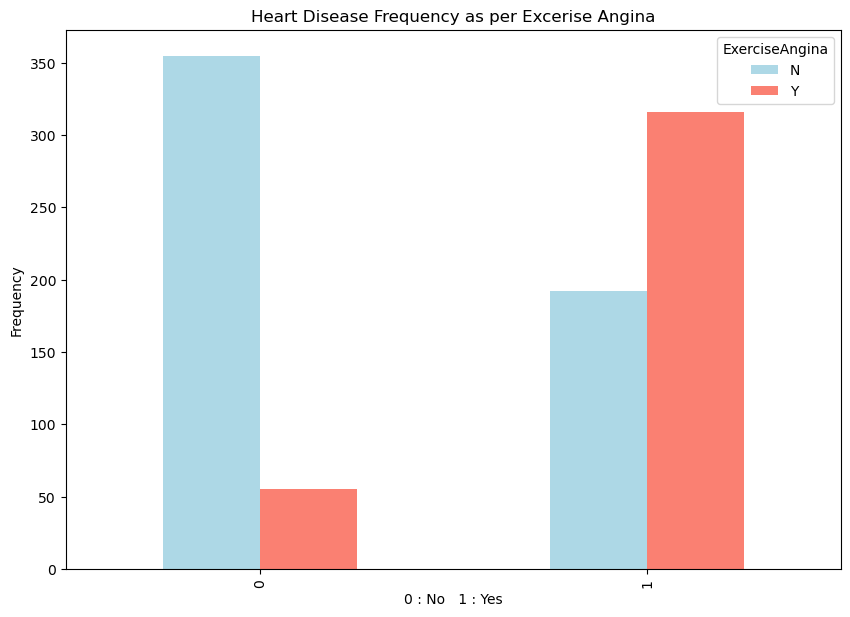

In [23]:
pd.crosstab(df.HeartDisease,df.ExerciseAngina).plot(kind = 'bar',figsize=(10,7),color = ['lightblue','salmon'])
plt.legend(title = "ExerciseAngina",loc = 'upper right')
plt.title("Heart Disease Frequency as per Excerise Angina")
plt.xlabel("0 : No   1 : Yes")
plt.ylabel("Frequency");

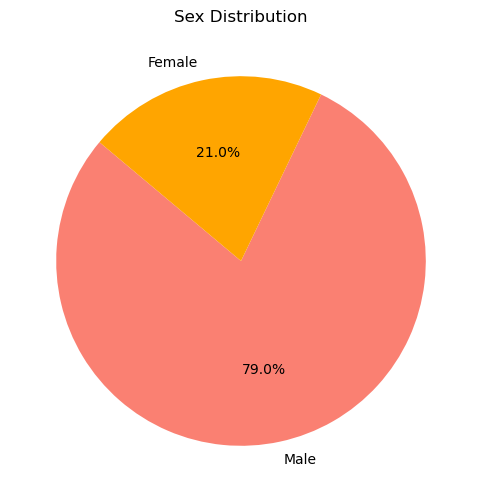

In [44]:
sex_count = df['Sex'].value_counts()
labels = ["Male","Female"]
colors = ["salmon","orange"]
plt.figure(figsize=(10,6))
plt.pie(sex_count,labels=labels,colors=colors,autopct="%1.1f%%",startangle = 140);
plt.title("Sex Distribution")
plt.show()

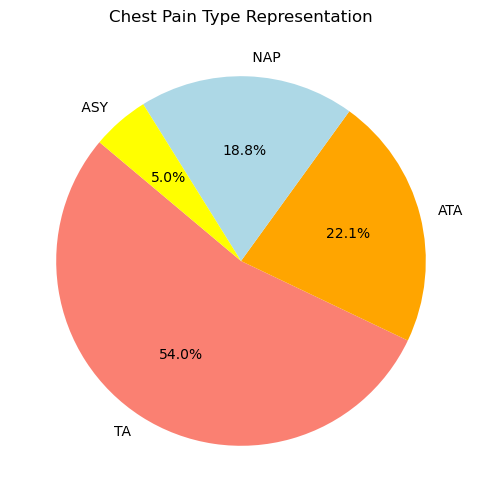

In [43]:
count = df['ChestPainType'].value_counts()
labels = ["TA", "ATA" ," NAP "," ASY" ]
colors = ["salmon","orange","lightblue","yellow"]
plt.figure(figsize=(10,6))
plt.pie(count,labels=labels,colors=colors,autopct="%1.1f%%",startangle = 140);
plt.title("Chest Pain Type Representation")
plt.show()

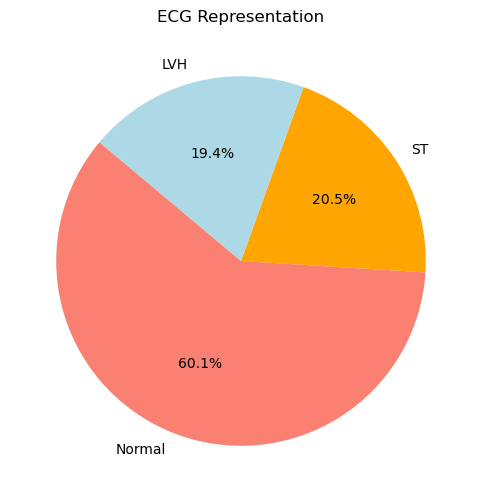

In [42]:
count = df['RestingECG'].value_counts()
labels = ['Normal', 'ST', 'LVH']
colors = ["salmon","orange","lightblue"]
plt.figure(figsize=(10,6))
plt.pie(count,labels=labels,colors=colors,autopct="%1.1f%%",startangle = 140);
plt.title("ECG Representation")
plt.show()

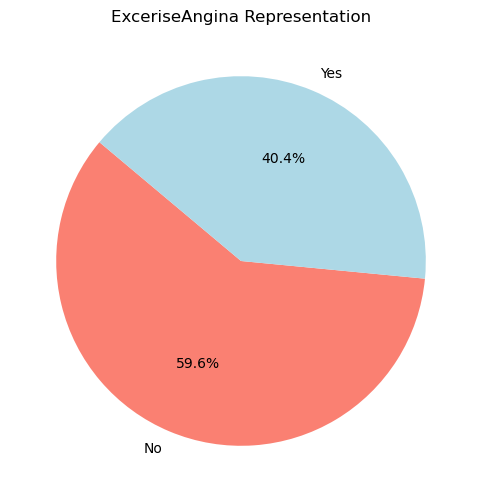

In [45]:
count = df['ExerciseAngina'].value_counts()
labels = ["No","Yes"]
colors = ["salmon","lightblue"]
plt.figure(figsize=(10,6))
plt.pie(count,labels=labels,colors=colors,autopct="%1.1f%%",startangle = 140);
plt.title("ExceriseAngina Representation")
plt.show()

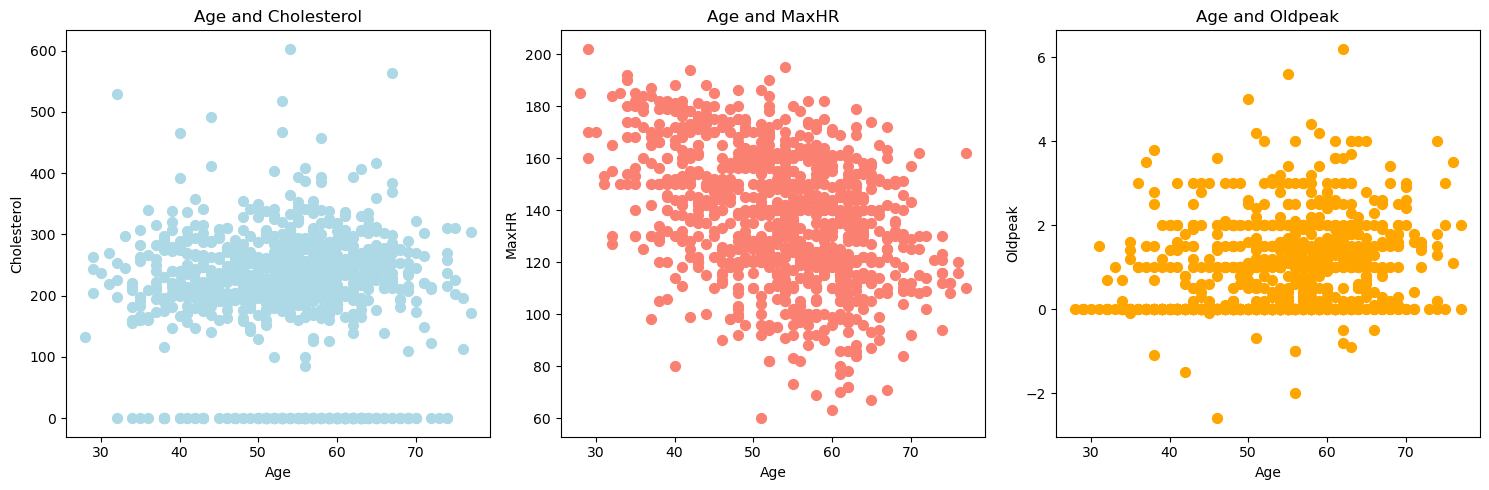

In [85]:
lst = ["Cholesterol", "MaxHR", "Oldpeak"]
colors = ['lightblue', 'salmon', 'orange']

fig, axes = plt.subplots(1, len(lst), figsize=(15, 5))

for i in range(len(lst)):
    axes[i].scatter(df['Age'], df[lst[i]], c=colors[i], marker='o', s=50)
    
    axes[i].set_title(f'Age and {lst[i]}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(lst[i])

plt.tight_layout()

plt.show()

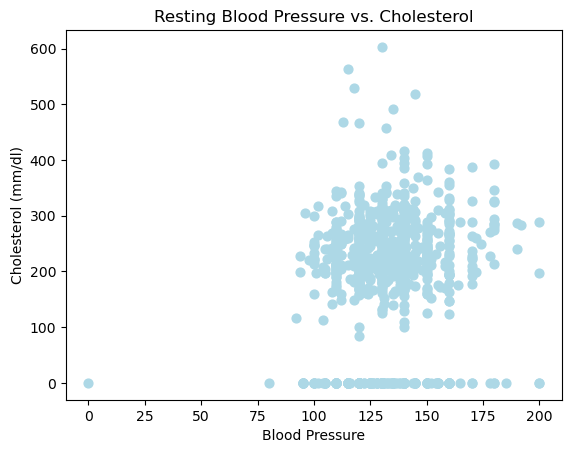

In [86]:
plt.scatter(df.RestingBP, df.Cholesterol, c='lightblue', marker='o', s=40)
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol (mm/dl)")
plt.title("Resting Blood Pressure vs. Cholesterol")
plt.show()

In [88]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [89]:
filtered_df = df

In [93]:
mapping_dict = {
    "Normal" : 0,
    "ST" : 1,
    "LVH":2
}
dict1 = {
    'Male':1,
    "Female":0
}

dict3 = {
    "N":0,
    "Y":1
}
dict4 = {
    "Up":0,
    "Down":1,
    "Flat":2
}
dict5 = {
    'TA': 3,
    'ATA': 2,
    'NAP': 1,
    'ASY': 0
}
filtered_df['RestingECG'] = filtered_df['RestingECG'].replace(mapping_dict)
filtered_df['Sex'] = filtered_df['Sex'].replace(dict1)
filtered_df['ExerciseAngina'] = filtered_df['ExerciseAngina'].replace(dict3)
filtered_df['ST_Slope'] = filtered_df['ST_Slope'].replace(dict4)
filtered_df['ChestPainType'] = filtered_df['ChestPainType'].replace(dict5)

In [96]:
filtered_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,0,0
3,48,0,0,138,214,0,0,108,1,1.5,2,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [95]:
l={
    "M":1,
    "F":0
}
filtered_df['Sex'] = filtered_df['Sex'].replace(l)

In [97]:
 filtered_df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.229156,0.282039
Sex,0.055750,1.000000,-0.168254,0.005133,-0.200092,0.120076,-0.018343,-0.189186,0.190664,0.105734,0.137949,0.305445
ChestPainType,-0.165896,-0.168254,1.000000,-0.022168,0.136139,-0.116703,-0.031383,0.343654,-0.416625,-0.245027,-0.330400,-0.471354
RestingBP,0.254399,0.005133,-0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.100997,0.107589
Cholesterol,-0.095282,-0.200092,0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.074839,-0.232741
FastingBS,0.198039,0.120076,-0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.138786,0.267291
RestingECG,0.213152,-0.018343,-0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.053073,0.061011
MaxHR,-0.382045,-0.189186,0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.375195,-0.400421
ExerciseAngina,0.215793,0.190664,-0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.432978,0.494282
Oldpeak,0.258612,0.105734,-0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.378955,0.403951


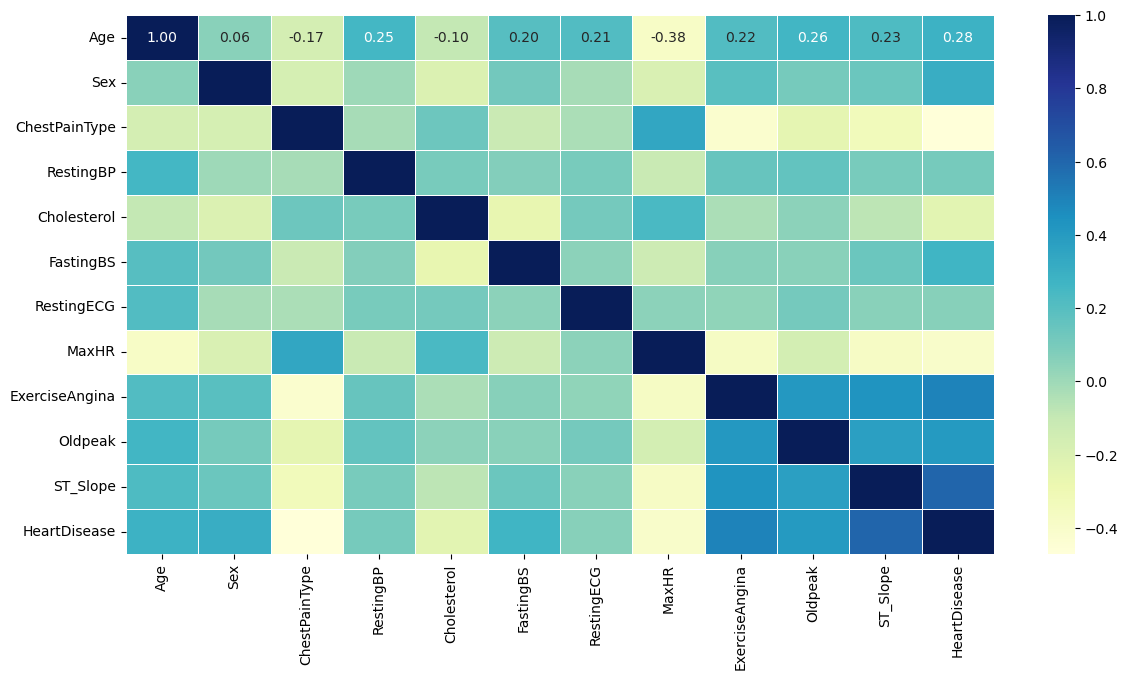

In [99]:
mat = filtered_df.corr()
fig,ax = plt.subplots(figsize = (14,7))
ax=sns.heatmap(mat,
               annot=True,
               annot_kws={"size": 10},
               linewidths = 0.5,
               fmt = '.2f',
               cmap='YlGnBu')

In [101]:
x= filtered_df.drop('HeartDisease',axis=1)
y = filtered_df['HeartDisease']
x.shape,y.shape

((918, 11), (918,))

In [102]:
np.random.seed(42)

x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2)

In [103]:
d = {
    "RandomForestClassifier":RandomForestClassifier(),
    "LogisticRegression":LogisticRegression(),
    "K-NearestCLassifier":KNeighborsClassifier()
}
def fit_model(models,x_train,x_test,y_train,y_test):
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [104]:
model_scores=fit_model(d,x_train,x_test,y_train,y_test)
model_scores

C:\Users\user\Desktop\sample_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.9021739130434783,
 'LogisticRegression': 0.8586956521739131,
 'K-NearestCLassifier': 0.7010869565217391}

In [147]:
rfc_grid = {"n_estimators":np.arange(10,200,10),
            "max_depth":[None,3,5,7,9,10],
            "min_samples_split":np.arange(2,30,2),
            "min_samples_leaf":np.arange(1,30,2)}


In [153]:
rfc = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions= rfc_grid,
                         n_iter = 100,
                         cv = 10,
                         verbose = True)
rfc.fit(x_train,y_train)
                         

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 7, 9, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [155]:
rfc.best_params_

{'n_estimators': 110,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 9}

In [154]:
rfc.score(x_test,y_test)


0.8967391304347826

In [158]:
model_scores["RandomForestClassifier"]

0.9021739130434783

In [ ]:
rfc_grid = {"n_estimators":np.arange(10,200,10),
            "max_depth":[None,3,5,7,9,10],
            "min_samples_split":np.arange(2,30,2),
            "min_samples_leaf":np.arange(1,30,2)}
# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), rfc_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object
grid_search.fit(x_train, y_train)

In [165]:
grid_search.score(x_test,y_test)

0.8804347826086957

In [ ]:
y_preds = grid_search.predict(x_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds)
